<a href="https://colab.research.google.com/github/Ibnuamrithaher/Mechine-Learning-And-Deep-Learning/blob/main/Classification%20Evaluation/Part7%20-%20Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 640.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.0 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.3-py2.py3-none-any.whl size=41032443 sha256=4531ec49667cf7254ccf67dc6d1be1e5334e5d0aa25e49b9f46cf22faf219d1f
  Stored in directory: /root/.cache/pip/wheels/25/9b/68/61b665f8682276ffbc7fa54bae3ccc541be2ed103979770b9b
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=ac2fea7e9c54c09ffd3babbef06bf538b0546ab65a1205adef2991d132c35fd4
  Stored in directory: /root/.cache/pip/wheels/77/a7/60/c75983f4da5b630422325c5048591b6ee9e2ce123bf2b7b357
Successfully built luwiji jcopml


In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.logistic_regression import illustration

## **Import Data**

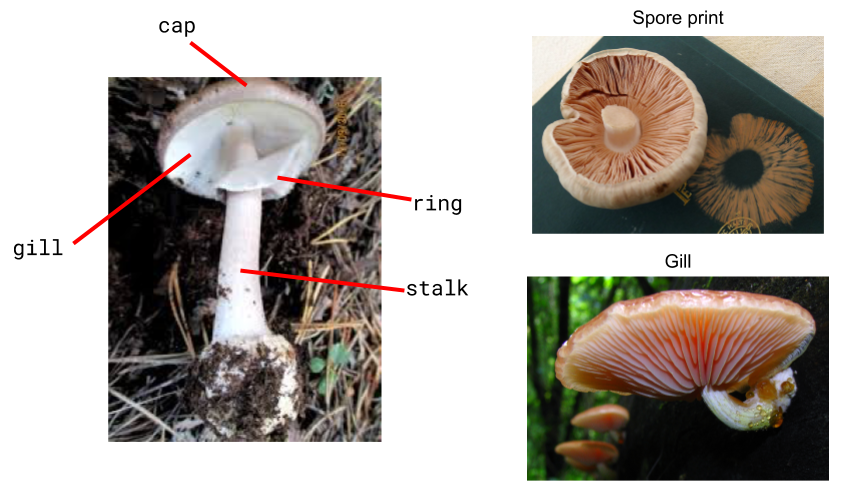

In [7]:
illustration.mushroom

In [3]:
url = "https://raw.githubusercontent.com/Ibnuamrithaher/Mechine-Learning-And-Deep-Learning/refs/heads/main/Classification%20Evaluation/Data/mushrooms.csv"
df = pd.read_csv(url)
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


,missing_value,%
edible,0,0.00
cap_shape,0,0.00
cap_surface,0,0.00
cap_color,0,0.00
bruises,0,0.00
odor,0,0.00
gill_attachment,0,0.00
gill_spacing,0,0.00
gill_size,0,0.00
gill_color,0,0.00


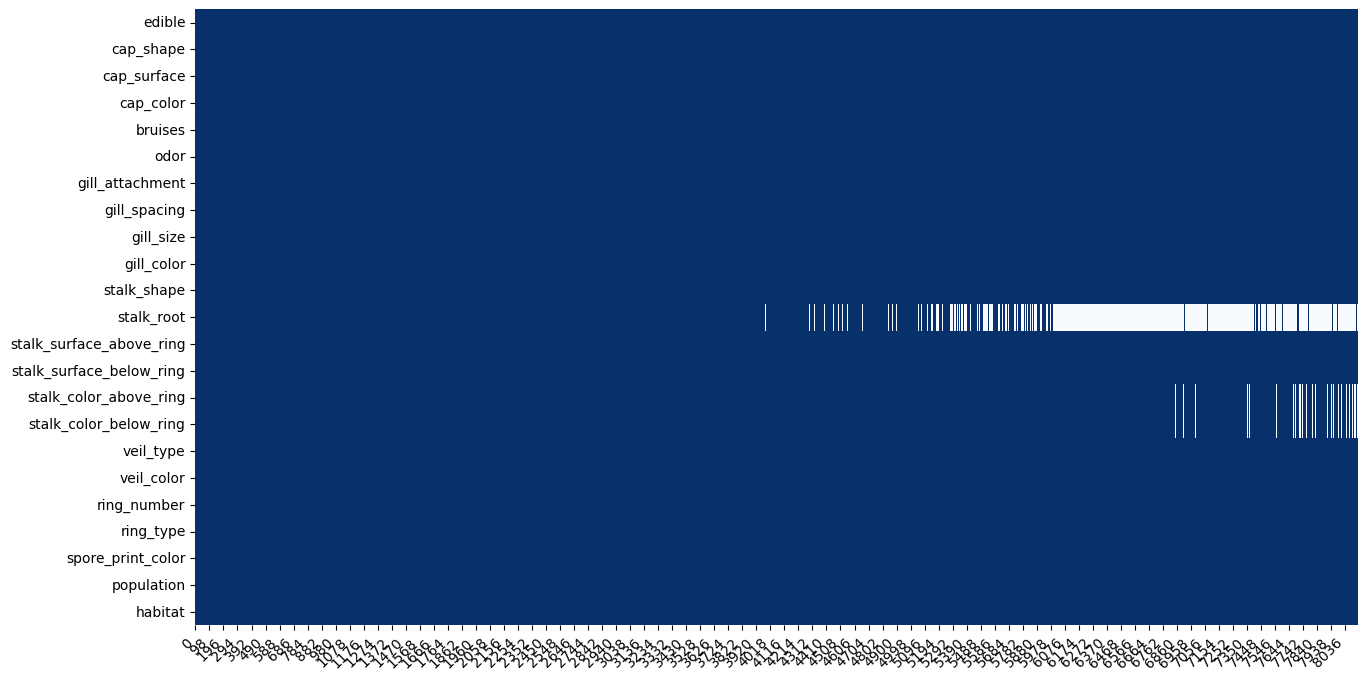

In [9]:
plot_missing_value(df, return_df=True)

In [10]:
df.edible.value_counts()

,count
edible,
True,4208
False,3916


## **Association Matrix**

In [11]:
from jcopml.plot import plot_association_matrix

In [12]:
plot_association_matrix(df, "edible", categoric_col='auto')

ValueError: Categorical column should have at least 2 category
You should remove these column from your data -> veil_type

In [13]:
df.veil_type.value_counts()

,count
veil_type,
partial,8124


In [14]:
df.drop(columns="veil_type", inplace=True)

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

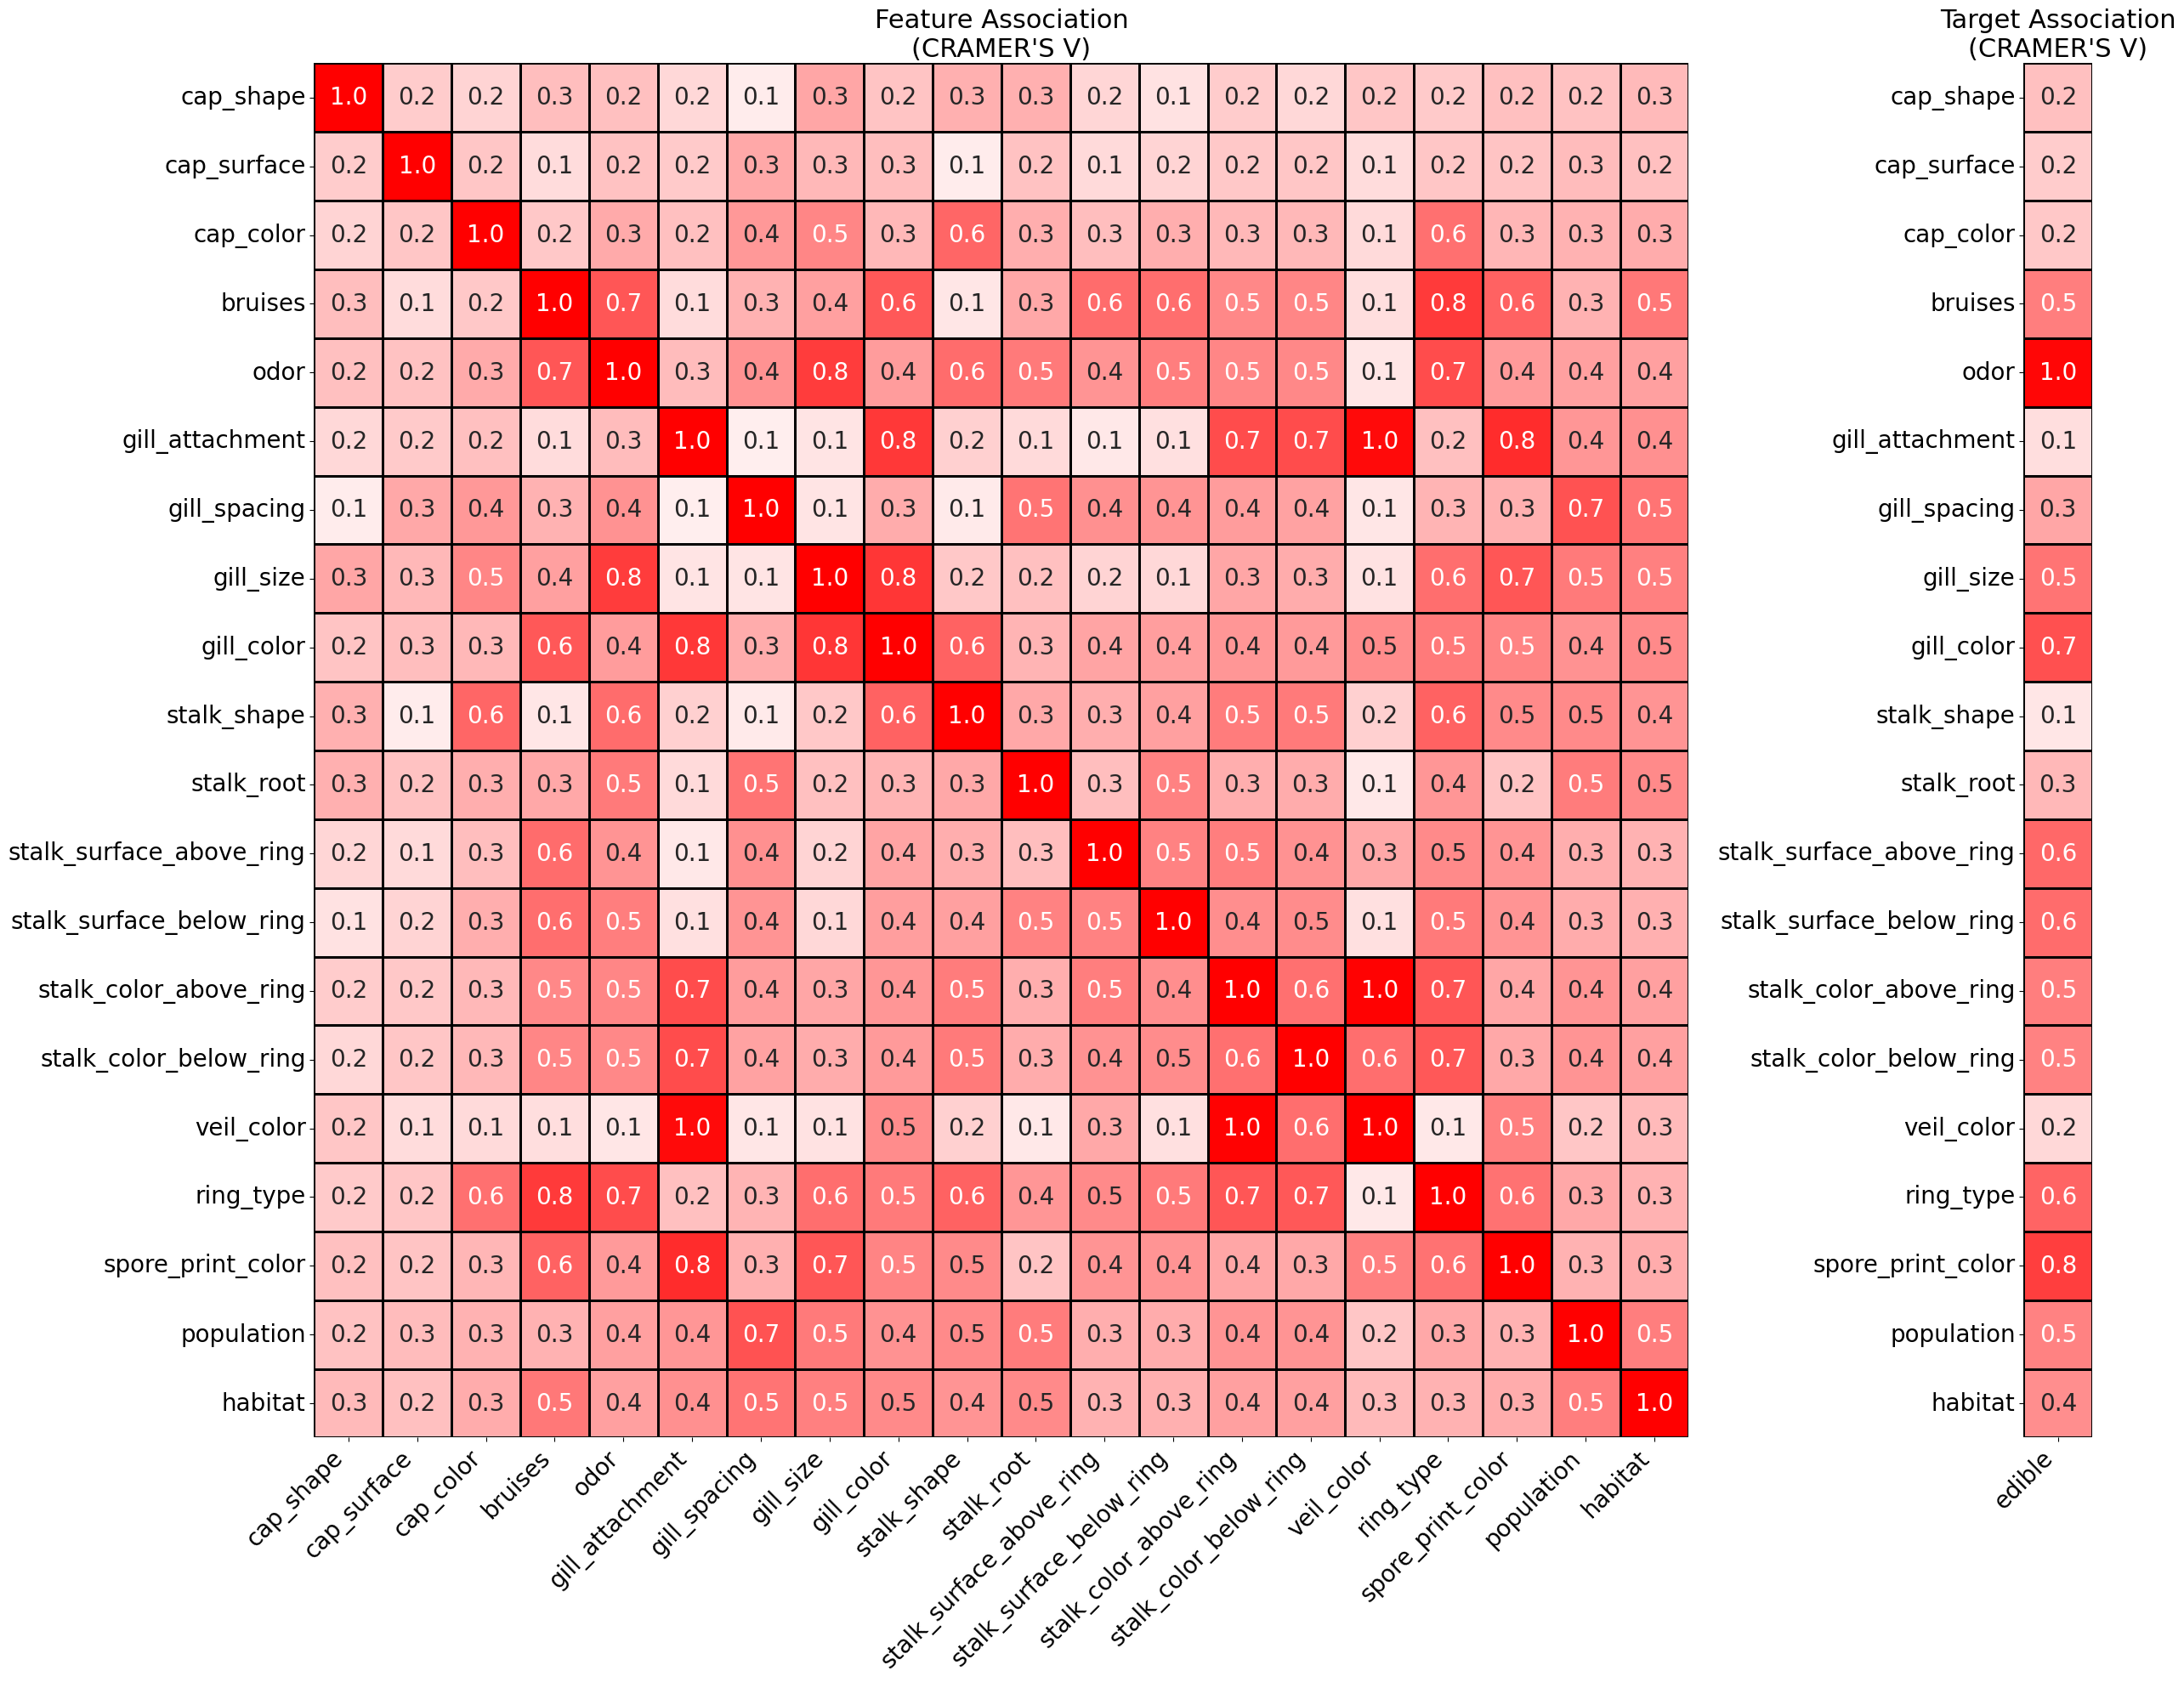

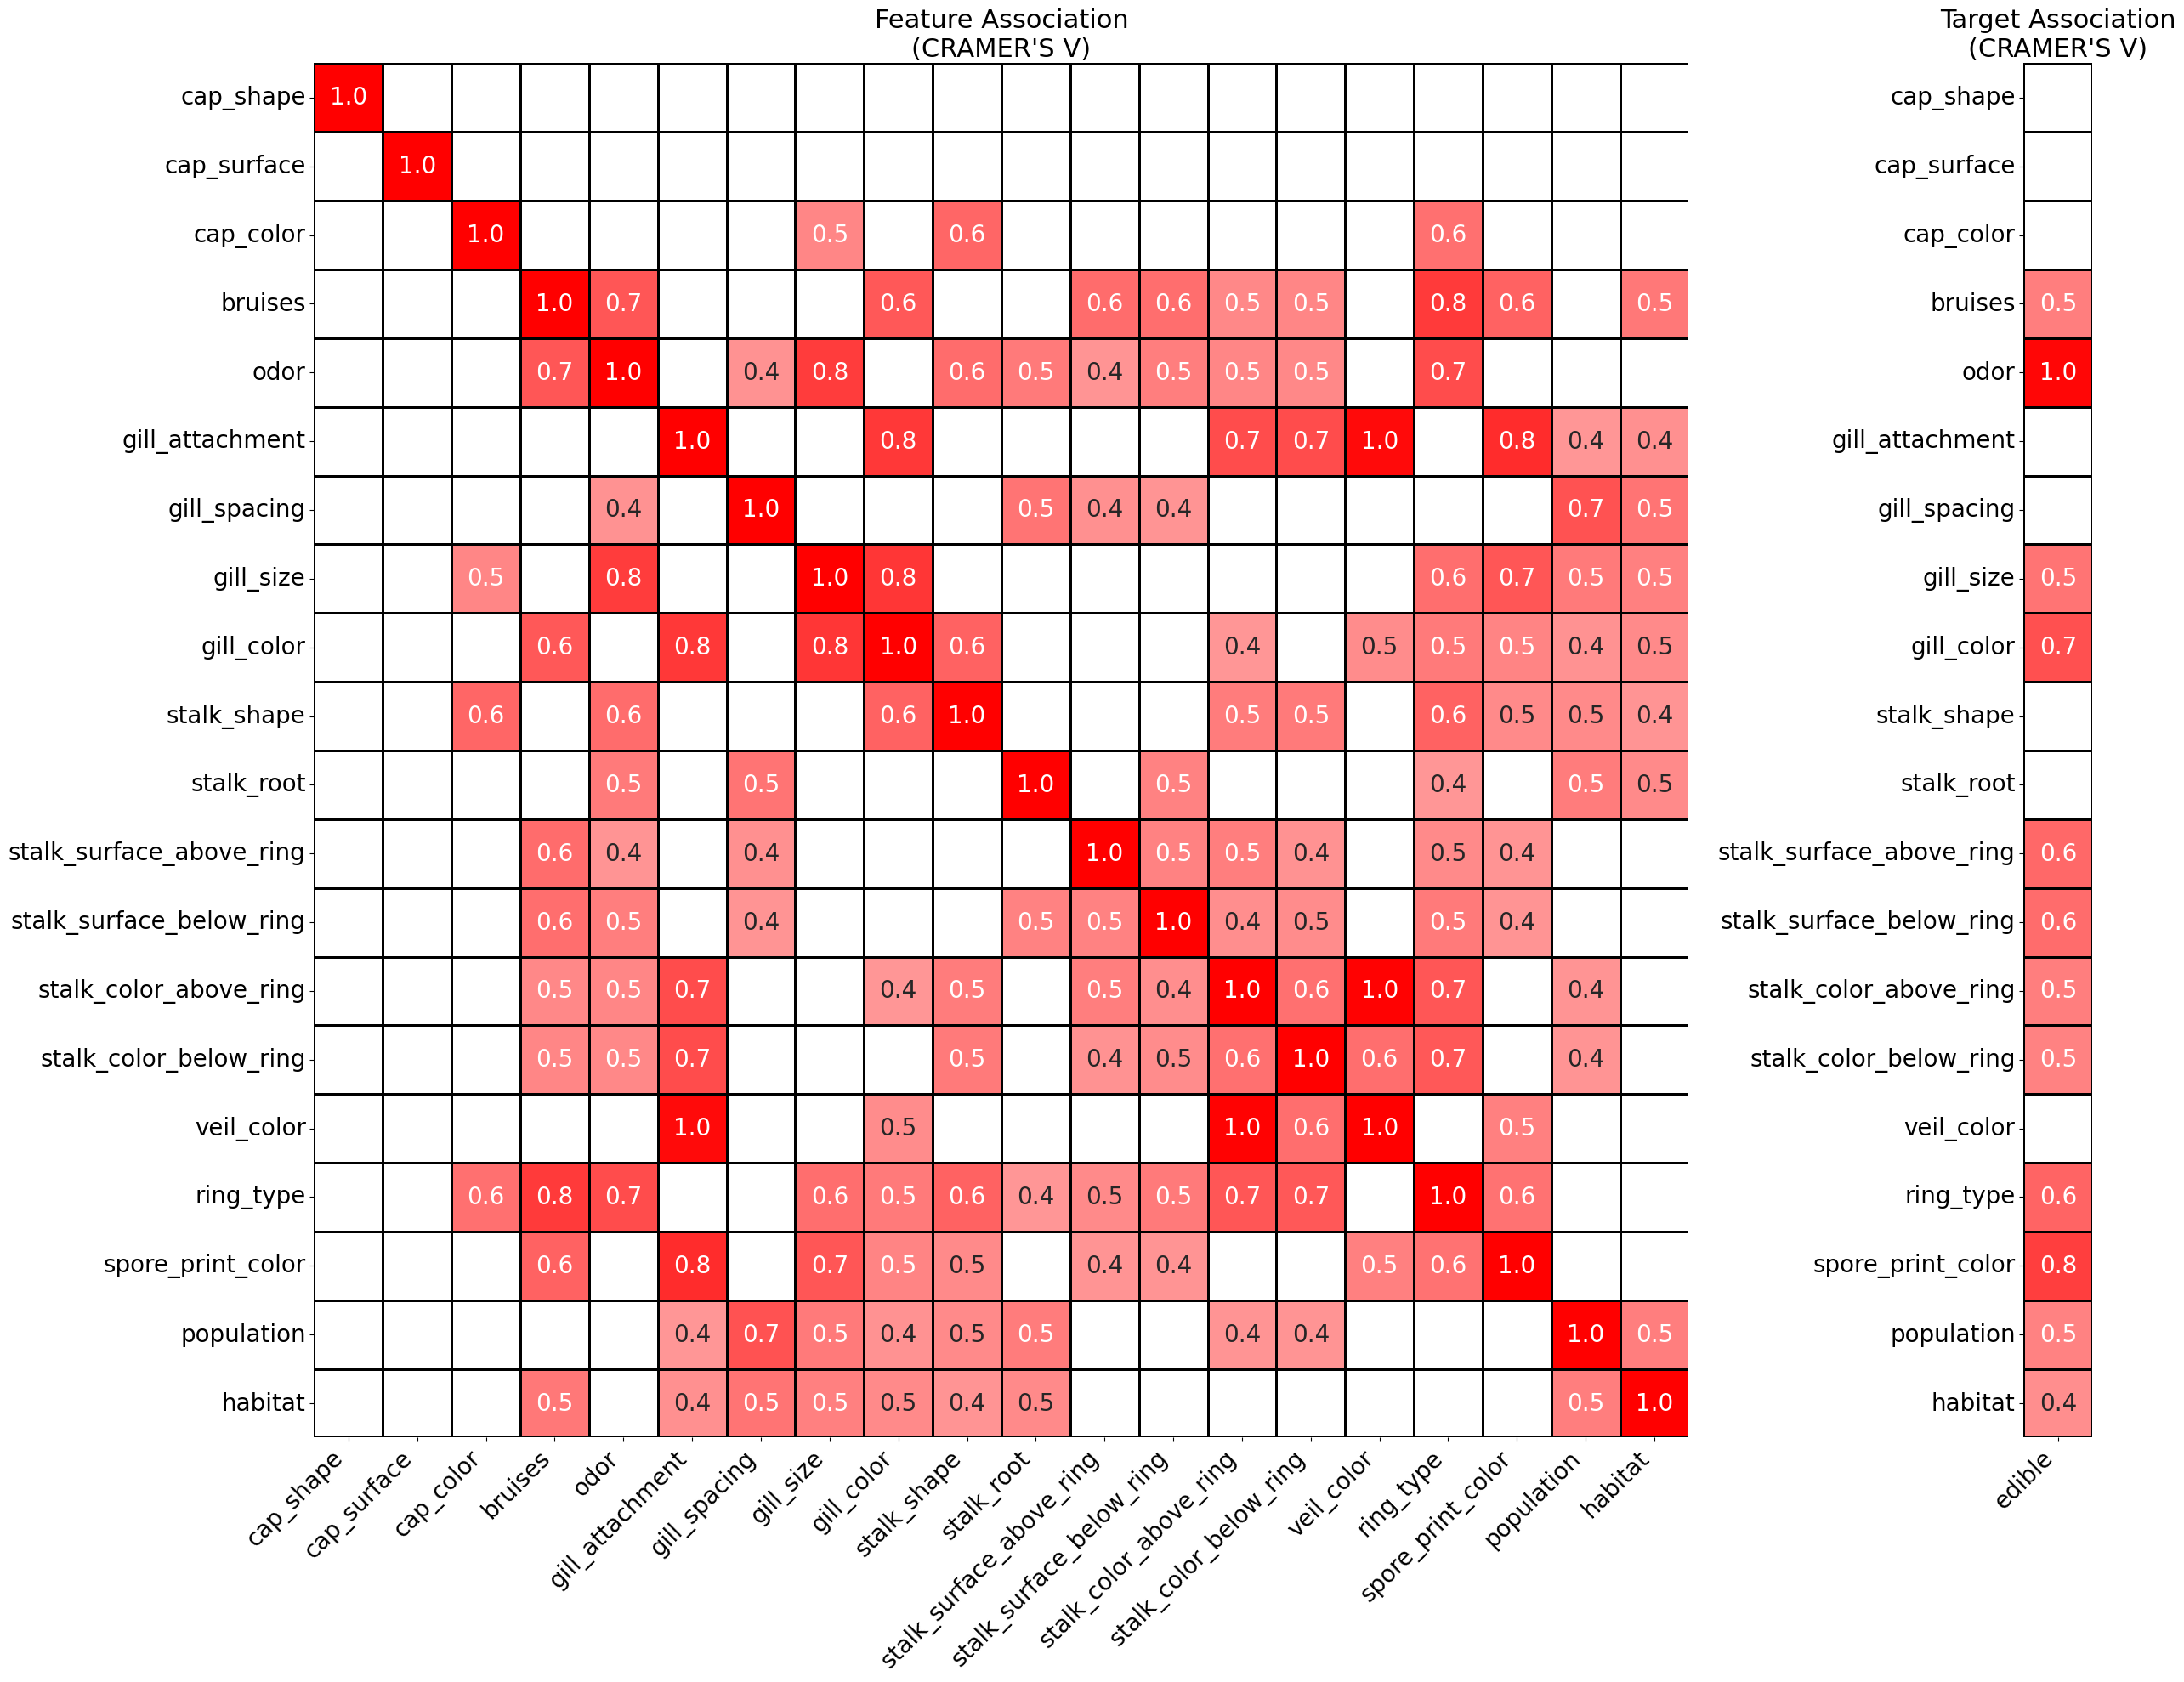

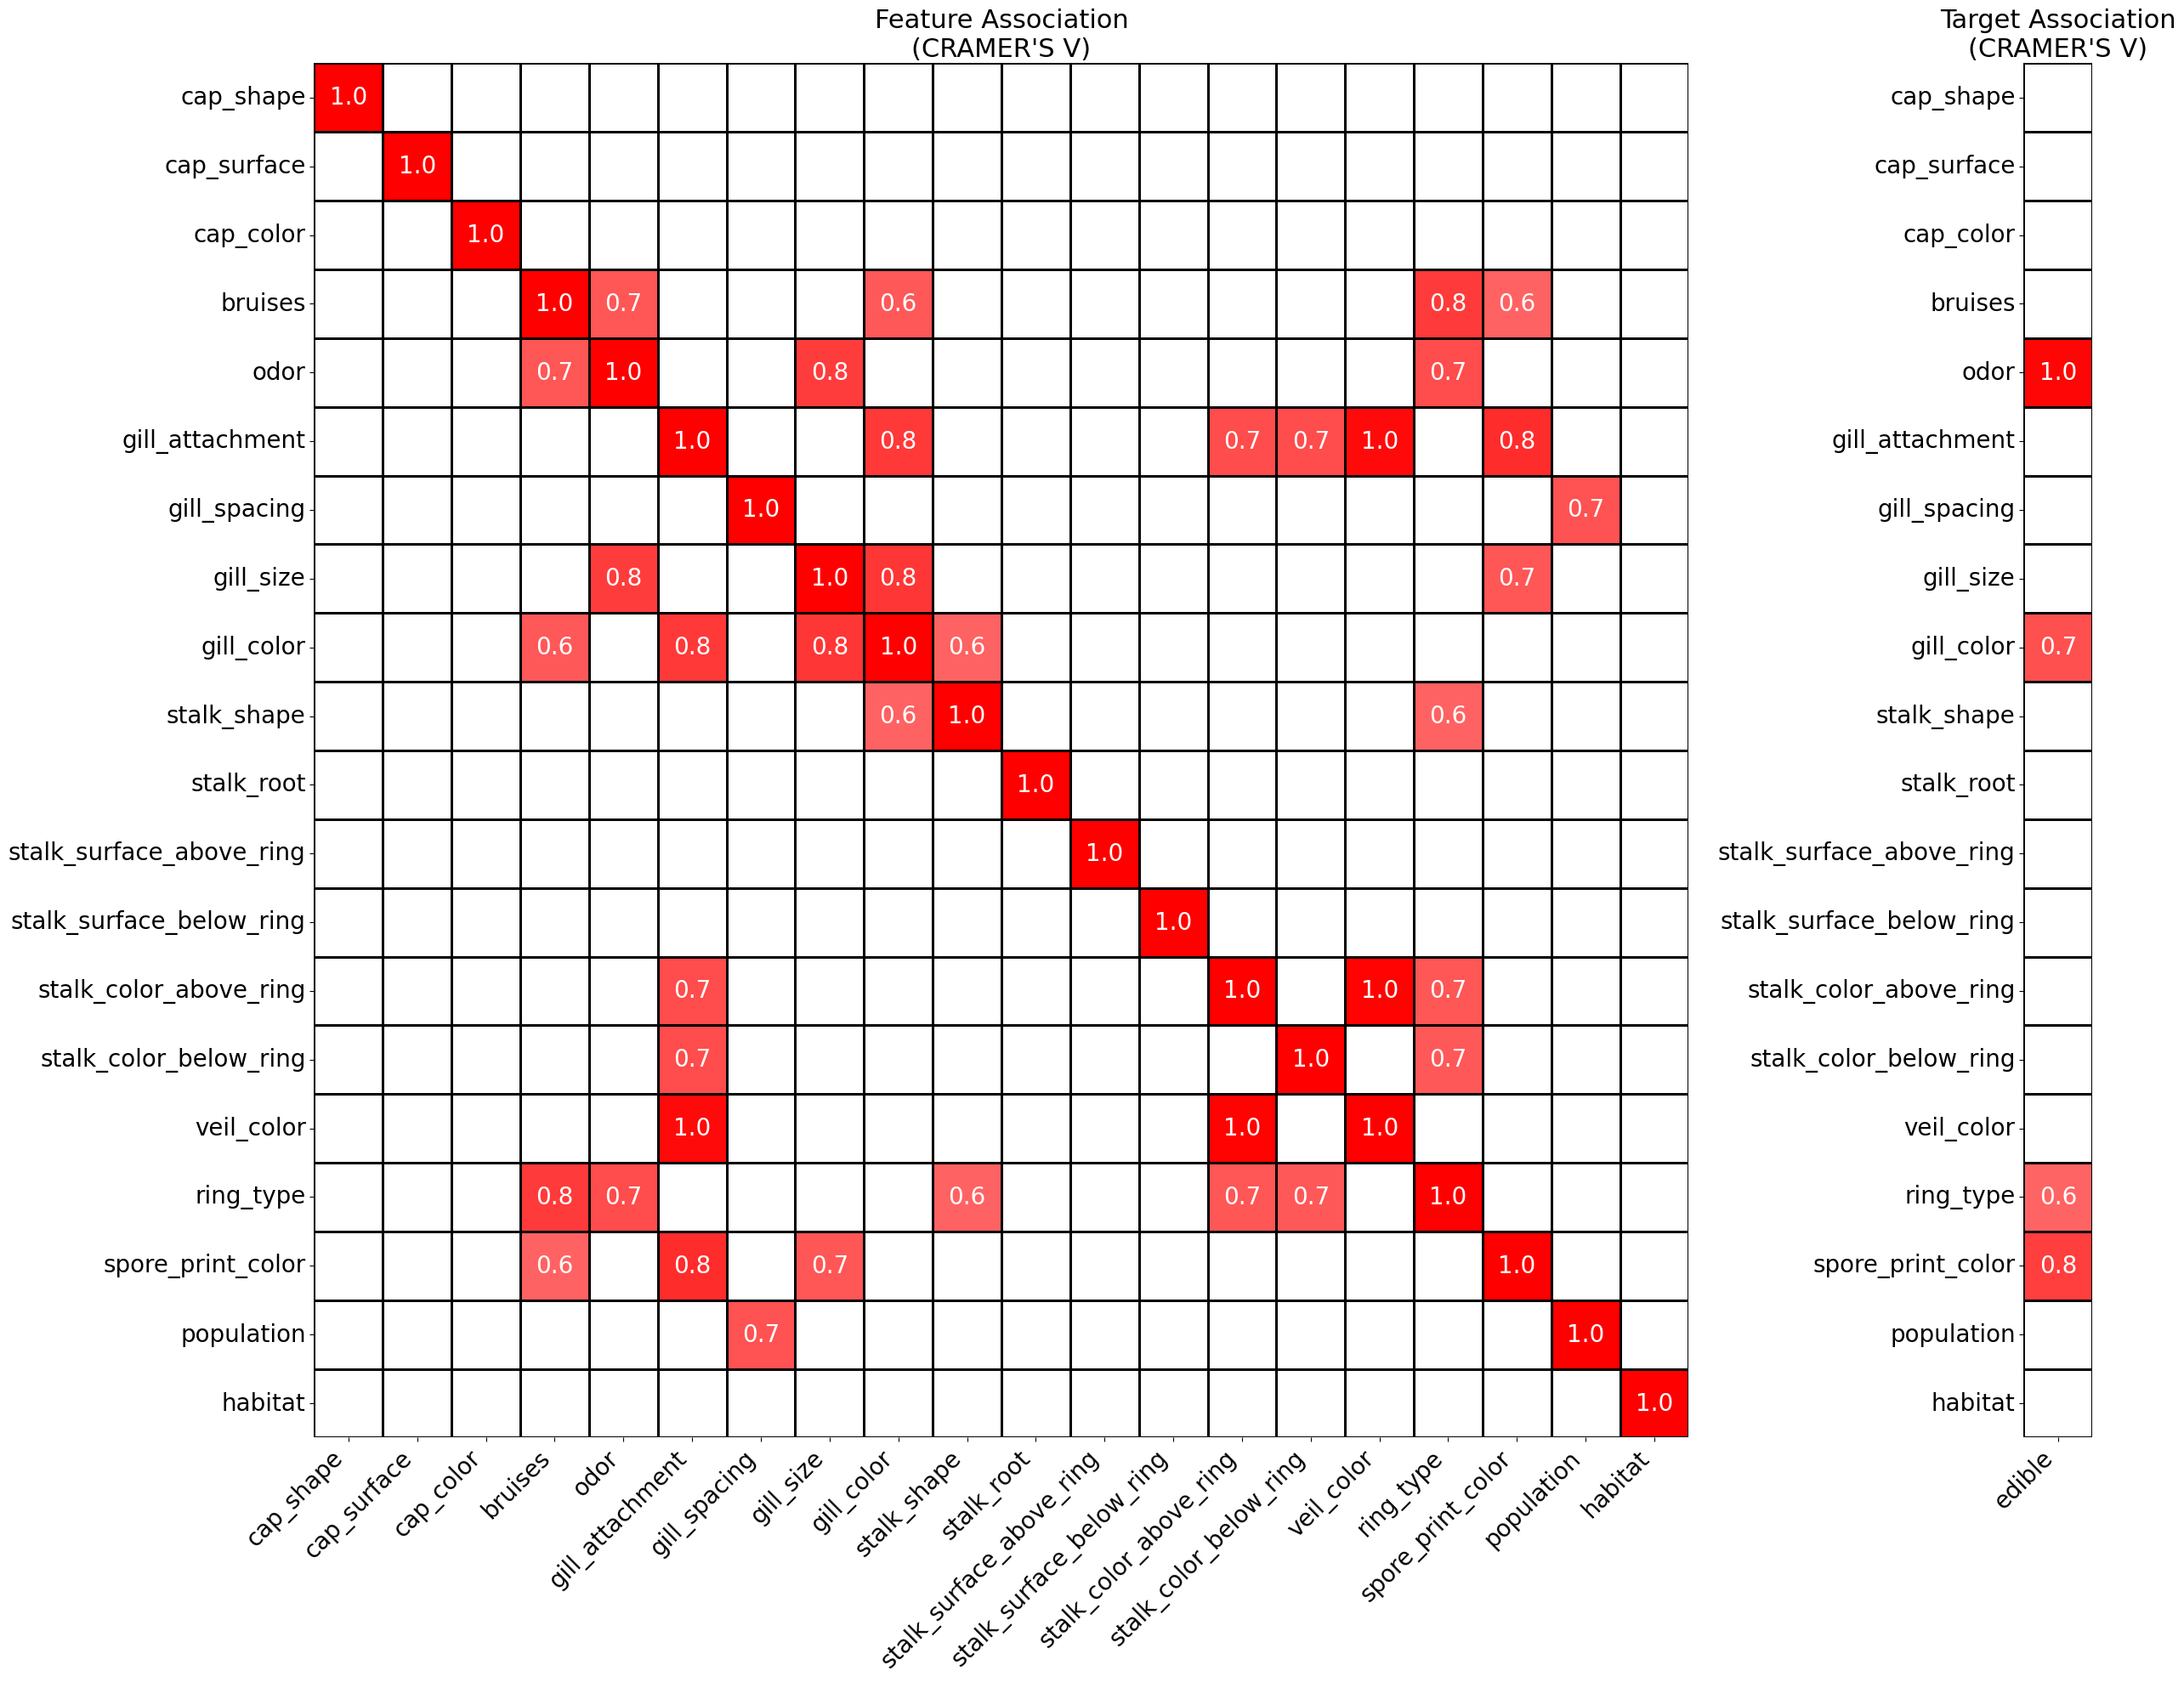

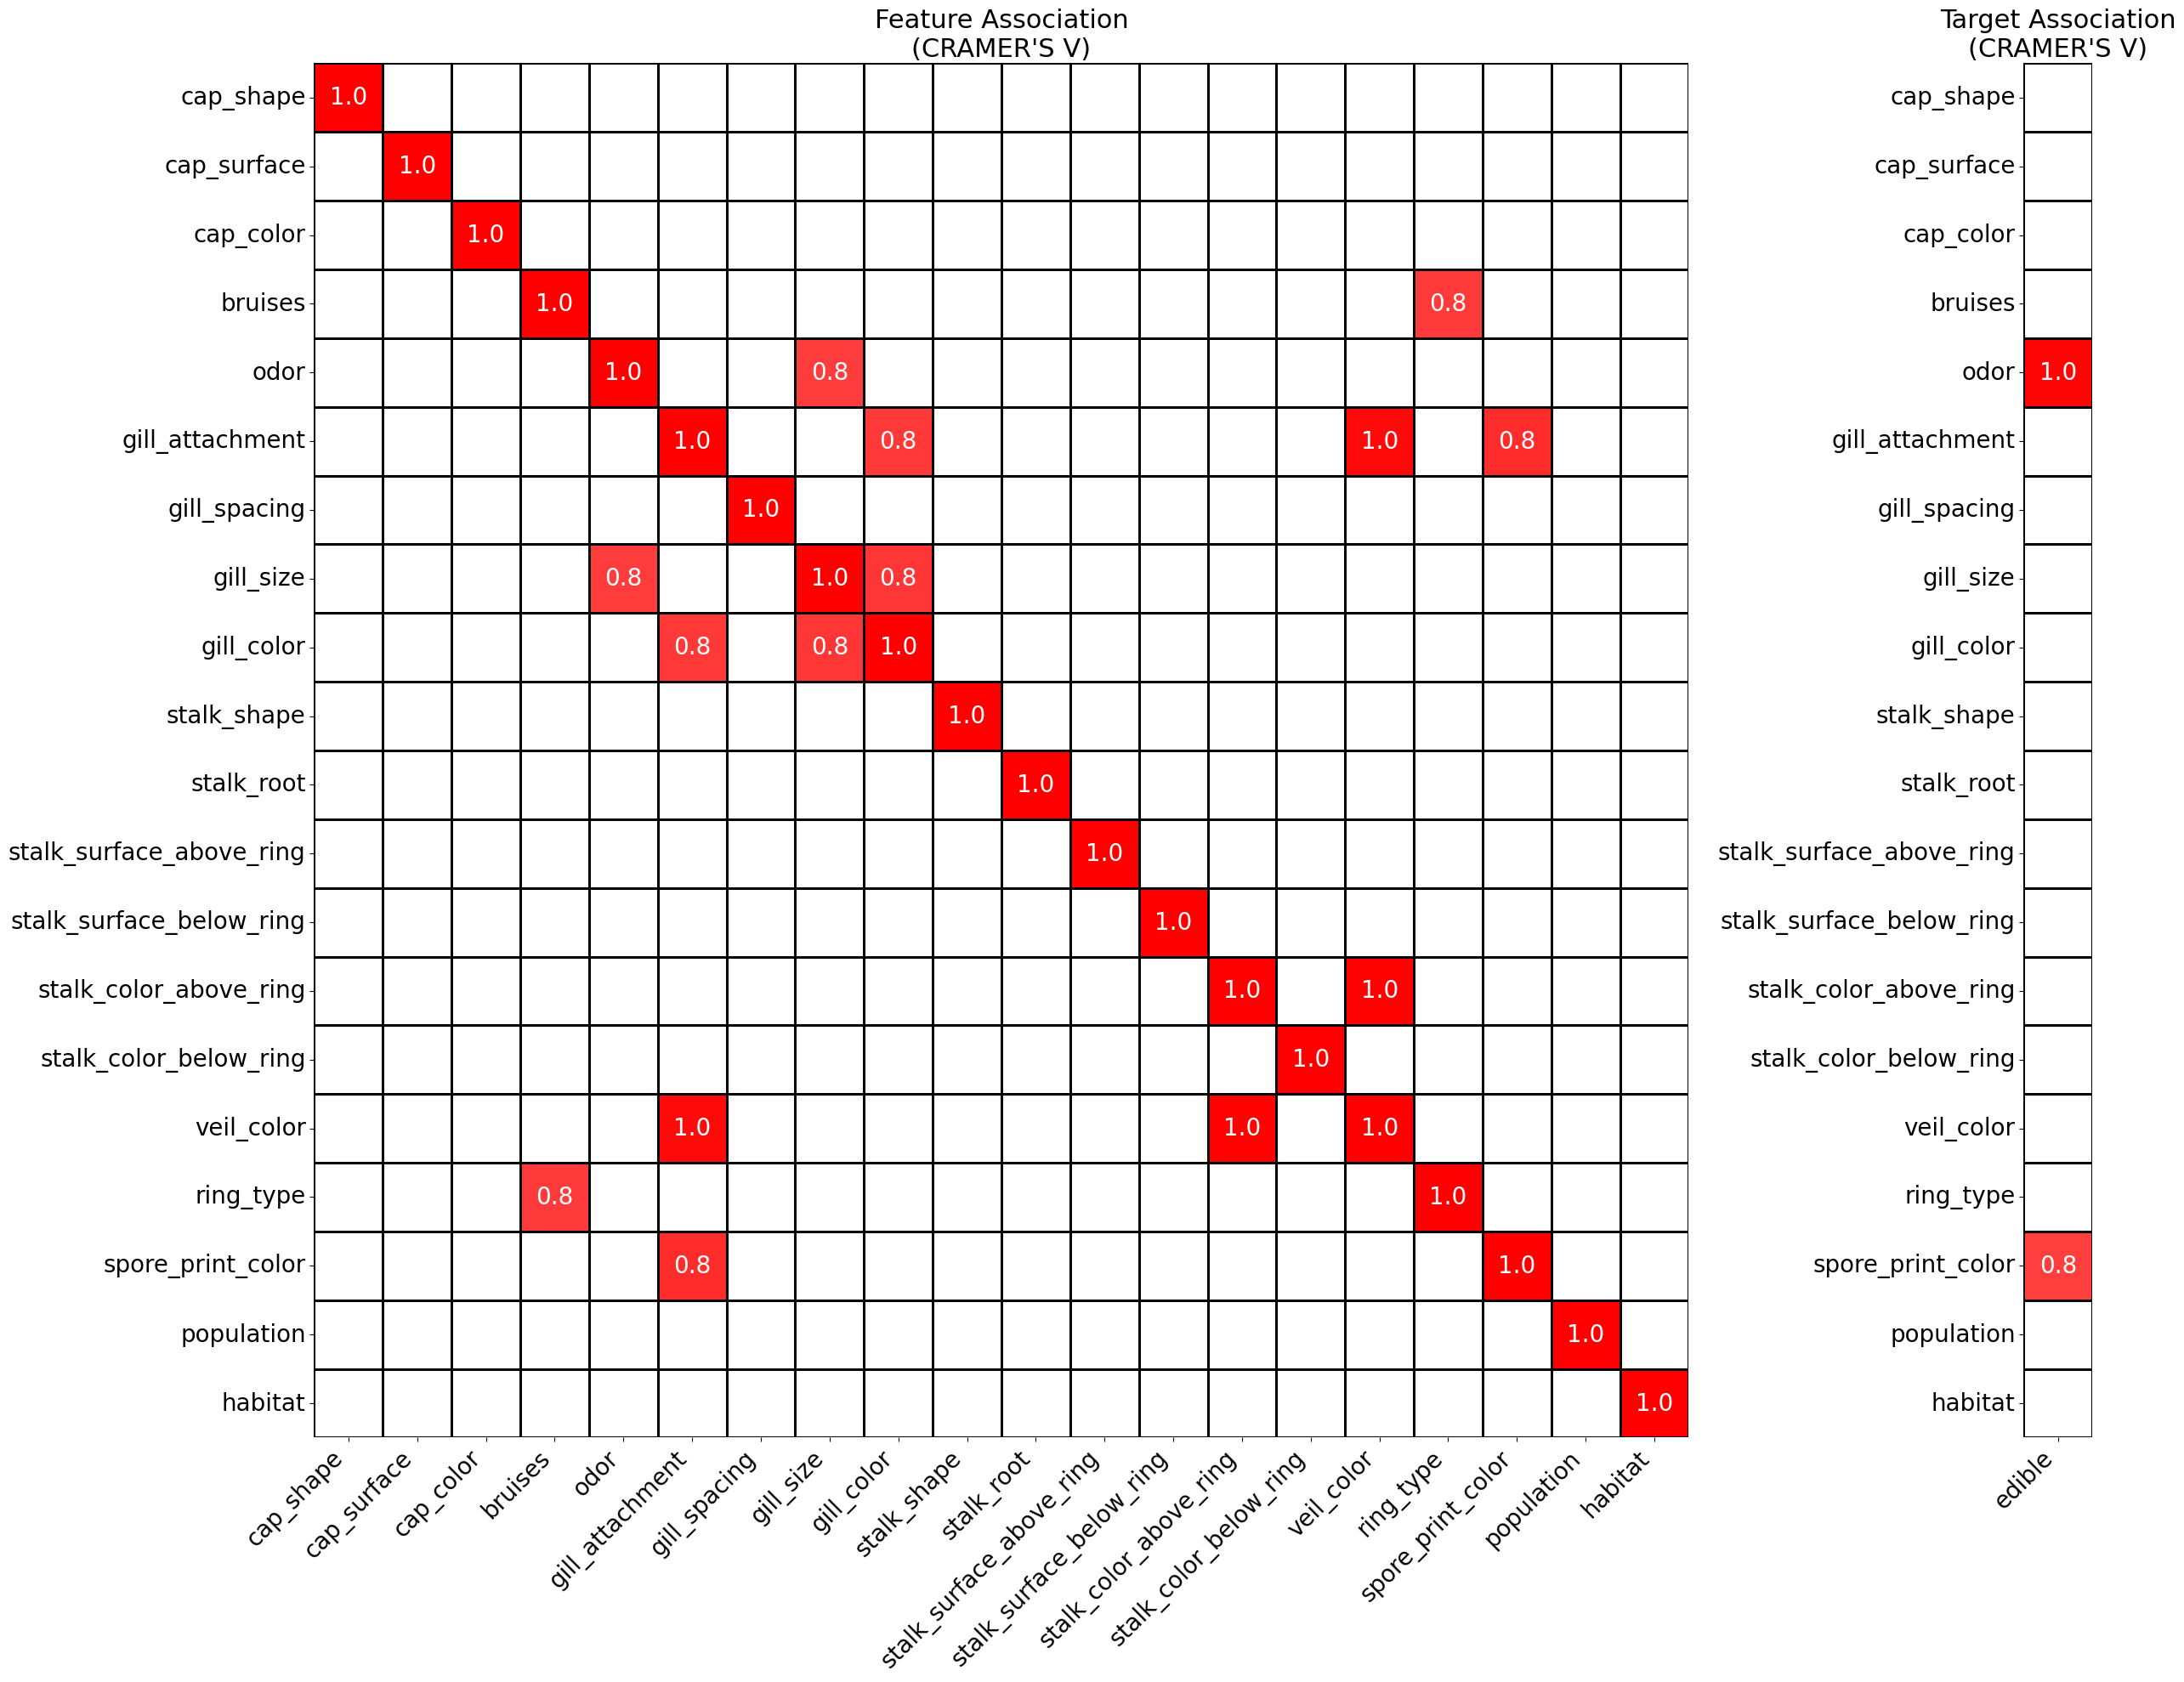

In [17]:
plot_association_matrix(df, "edible", categoric_col='auto')

Kita bisa lihat dari proficiency bahwa odor sangat menentukan apakah suatu jamur edible atau tidak *U(X|Y)* = 0.9, tapi bukan berarti sebaliknya *U(Y|X)* = 0.4

## **Dataset Splitting**

In [16]:
X = df[["odor","gill_color", "ring_type", "spore_print_color"]]
y = df.edible

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((6499, 4), (1625, 4), (6499,), (1625,))

## **Training**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [19]:
X_train

,odor,gill_color,ring_type,spore_print_color
7873,spicy,buff,evanescent,white
6515,foul,buff,evanescent,white
6141,fishy,buff,evanescent,white
2764,none,purple,pendant,brown
438,anise,black,pendant,brown
...,...,...,...,...
5226,foul,buff,evanescent,white
5390,none,white,evanescent,white
860,anise,white,pendant,brown
7603,foul,buff,evanescent,white


In [22]:
preprocessor = ColumnTransformer([
    ("categoric", cat_pipe(encoder='onehot'), X_train.columns),
])

pipeline = Pipeline([
    ("prep",preprocessor),
    ("algo",LogisticRegression(solver='lbfgs', n_jobs=1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train,y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 100.0, 'algo__fit_intercept': True}
0.9949222957378058 0.9949222954974041 0.9932307692307693


## **Evalluation**

In [25]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve

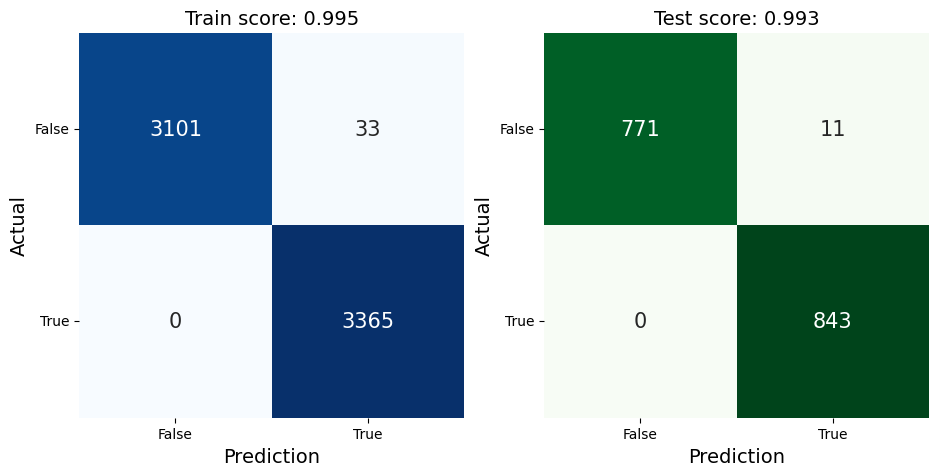

In [26]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [27]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3134
        True       0.99      1.00      1.00      3365

    accuracy                           0.99      6499
   macro avg       1.00      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       782
        True       0.99      1.00      0.99       843

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



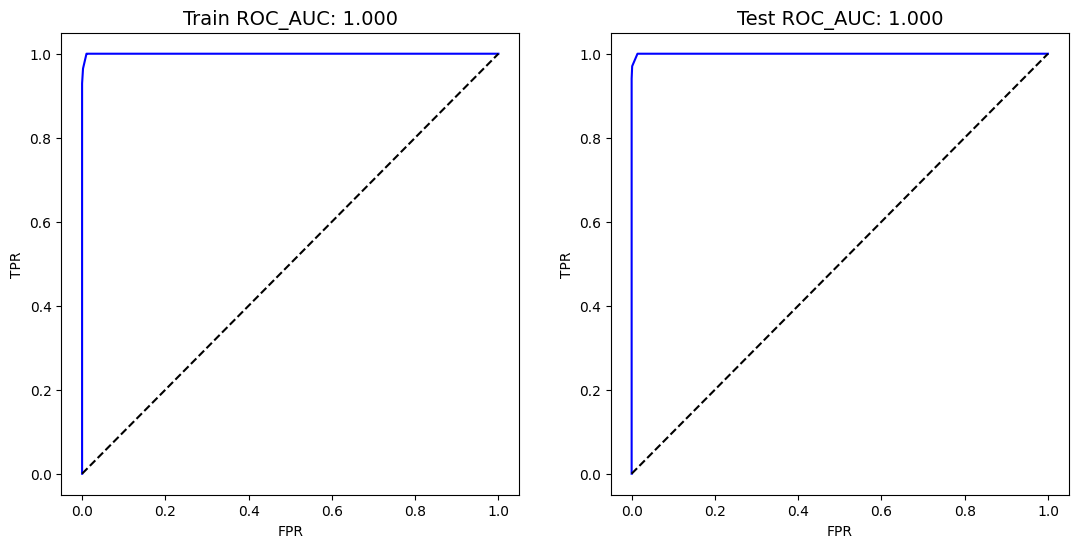

In [28]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

## **Feature Importance**

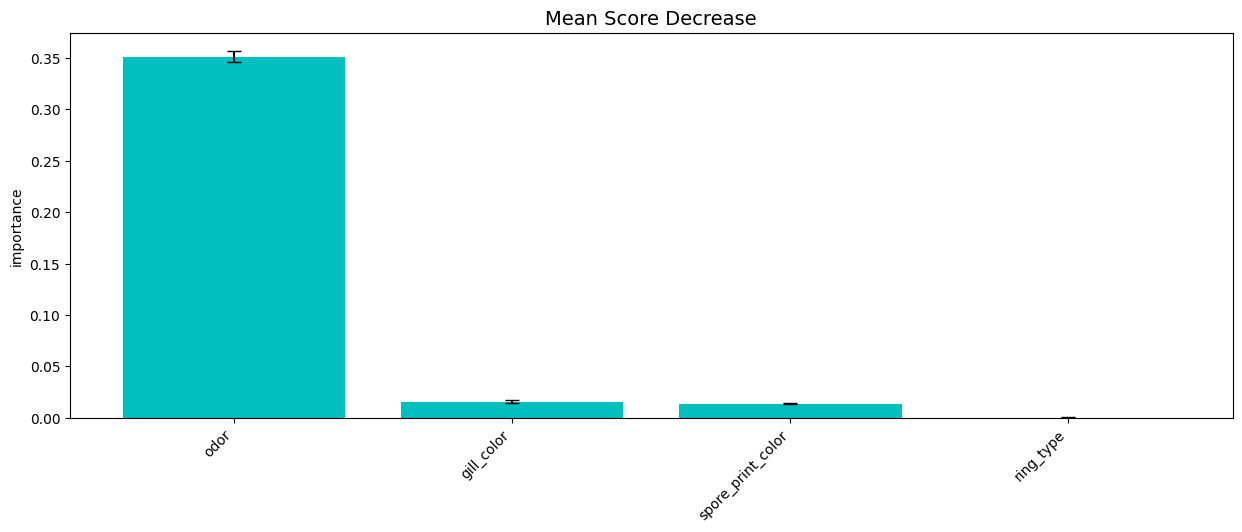

In [29]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

## **Insight from data**

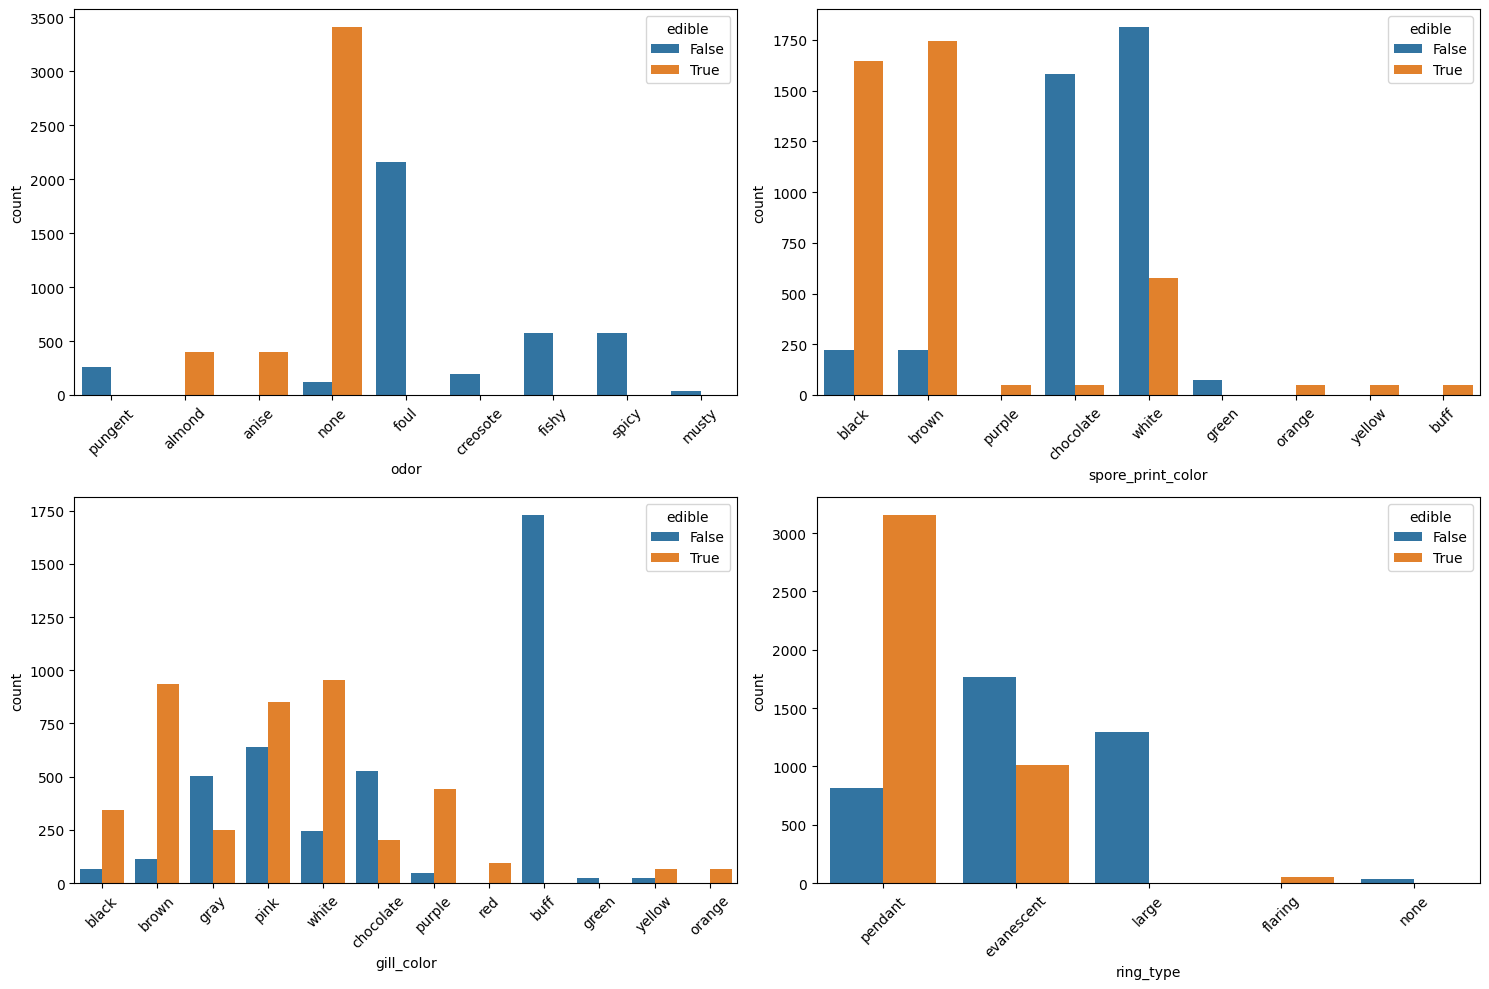

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Odor distribution
plt.subplot(221)
sns.countplot(data=df, x='odor', hue='edible')
plt.xticks(rotation=45)

# Spore print color distribution
plt.subplot(222)
sns.countplot(data=df, x='spore_print_color', hue='edible')
plt.xticks(rotation=45)

# Gill color distribution
plt.subplot(223)
sns.countplot(data=df, x='gill_color', hue='edible')
plt.xticks(rotation=45)

# Ring type distribution
plt.subplot(224)
sns.countplot(data=df, x='ring_type', hue='edible')
plt.xticks(rotation=45)

plt.tight_layout()

## **Correlation Ratio (Optional)**

In [37]:
from jcopml.plot import plot_correlation_ratio

In [41]:
plot_correlation_ratio(df, ['edible','cap_shape','odor'],['ring_number'])

TypeError: agg function failed [how->mean,dtype->object]